In [42]:
import tensorflow  as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
mnist= tf.keras.datasets.mnist

In [44]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

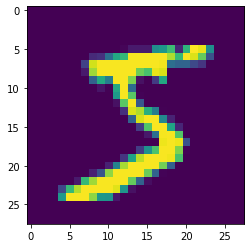

In [45]:
plt.imshow(X_train[0])

In [46]:
X_train=X_train/255
X_test=X_test/255


In [47]:
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened= X_test.reshape(len(X_test), 28*28)

In [48]:
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6583 - accuracy: 0.8326
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.9048
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2899 - accuracy: 0.9176
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9274
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2351 - accuracy: 0.9342


In [49]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2191 - accuracy: 0.9376


[0.21907417476177216, 0.9376000165939331]

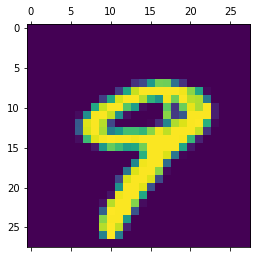

In [50]:
plt.matshow(X_test[9])

In [51]:
y_predicted=model.predict(X_test_flattened)
y_predicted[9]

array([2.1375299e-01, 2.8750300e-04, 4.2403877e-02, 6.2041193e-02,
       9.8879313e-01, 3.4776875e-01, 3.2843977e-02, 9.9481159e-01,
       9.5584512e-01, 9.9977344e-01], dtype=float32)

In [52]:
np.argmax(y_predicted[9])

9

In [53]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6908), started 0:01:16 ago. (Use '!kill 6908' to kill it.)